In [5]:
!pip install split-folders

In [6]:
# STEP 1: Mount Google Drive
# ==========================
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
!unzip -q "/content/drive/MyDrive/archive (3).zip" -d /content/brain_tumor

In [10]:
!ls /content/brain_tumor

Testing  Training


In [11]:
# 1. Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [12]:
# 2. Paths (adjust if needed)
train_dir = "/content/brain_tumor/Training"
test_dir  = "/content/brain_tumor/Testing"

In [13]:
# 3. Data generators (with augmentation for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# 4. Train & validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical", # Changed to categorical for multiclass
    subset="training"
)

Found 4571 images belonging to 4 classes.


In [15]:
# 5. Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  # Changed to 4 for 4 classes and softmax for multiclass
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Changed to categorical_crossentropy for multiclass
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 5. Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  # Changed to 4 for 4 classes and softmax for multiclass
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Changed to categorical_crossentropy for multiclass
              metrics=['accuracy'])

model.summary()

# 4. Train & validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical", # Changed to categorical for multiclass
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical", # Changed to categorical for multiclass
    subset="validation"
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [ ]:
# 6. Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 39s 272ms/step - accuracy: 0.8912 - loss: 0.2862 - val_accuracy: 0.8019 - val_loss: 0.5830
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 265ms/step - accuracy: 0.8886 - loss: 0.2778 - val_accuracy: 0.8072 - val_loss: 0.6047
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - accuracy: 0.8853 - loss: 0.2831 - val_accuracy: 0.8186 - val_loss: 0.5487
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 267ms/step - accuracy: 0.9055 - loss: 0.2509 - val_accuracy: 0.8081 - val_loss: 0.5723
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - accuracy: 0.9023 - loss: 0.2595 - val_accuracy: 0.8160 - val_loss: 0.5335
Epoch 6/10
113/143 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.9054 - loss: 0.2275

In [22]:
# 7. Evaluate model
test_loss, test_acc = model.evaluate(val_generator, verbose=2)
print("Test Accuracy:", test_acc)

36/36 - 7s - 186ms/step - accuracy: 0.7862 - loss: 0.6150
Test Accuracy: 0.7861524820327759


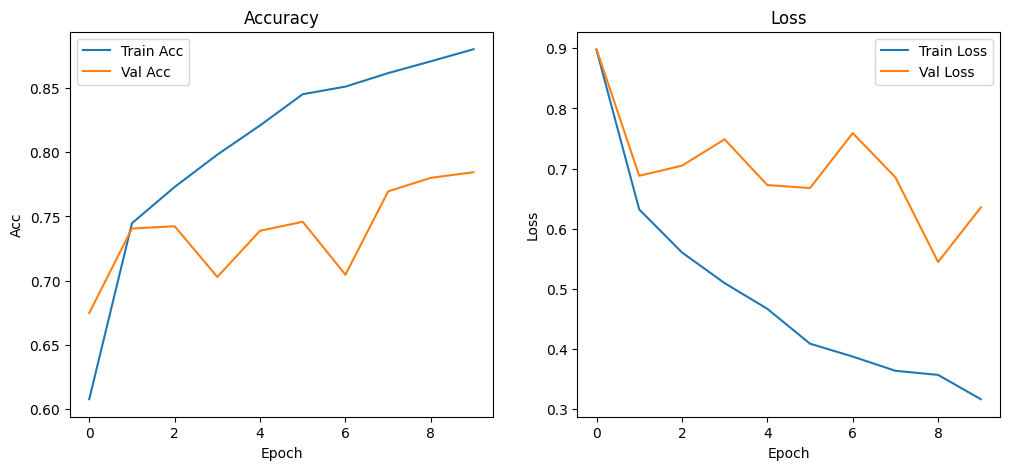

In [23]:
# 8. Plot accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend(); plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(); plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


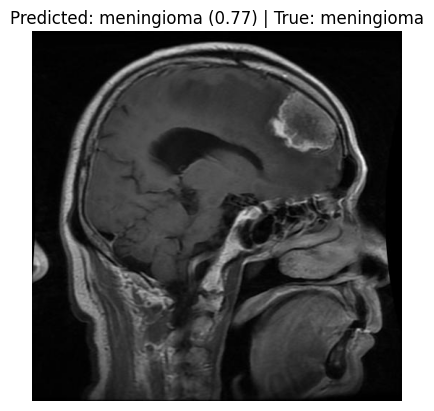

In [25]:
# 9. Visual example prediction
# Pick random image from test set
sample_class = random.choice(os.listdir(test_dir))  # e.g. 'yes' or 'no'
sample_img = random.choice(os.listdir(os.path.join(test_dir, sample_class)))
img_path = os.path.join(test_dir, sample_class, sample_img)

img = tf.keras.utils.load_img(img_path, target_size=(150,150))
img_array = tf.keras.utils.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0] # Predict probabilities for each class
predicted_class_index = np.argmax(pred) # Get the index of the class with the highest probability
class_labels = list(val_generator.class_indices.keys()) # Get class labels from the generator
predicted_label = class_labels[predicted_class_index]

plt.imshow(tf.keras.utils.load_img(img_path))
plt.title(f"Predicted: {predicted_label} ({pred[predicted_class_index]:.2f}) | True: {sample_class}")
plt.axis("off")
plt.show()